### Importing the Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plotly imports
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

### Uploading the dataset

In [70]:
df = pd.read_csv('insurance.csv')

In [71]:
df_copy = df.copy()

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Finding Missing Values

In [74]:
# # make a list of the variables that contain missing values
# vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# # determine percentage of missing values
# df[vars_with_na].isnull().mean()

In [75]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset

### Analyzing the categorial variables in the dataset - Sex, Smoker and Region

In [76]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [78]:
# capture categorical variables in a list
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  3


In [79]:
df[cat_vars].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


###### Finding the Cardinality of the categorical variables

In [80]:
df[cat_vars].nunique()

sex       2
smoker    2
region    4
dtype: int64

### Changing the Encoding of the Categorical variables

All methods of categorical encoding should be performed over the training set, and then propagated to the test set.

Why?

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [81]:
# to split the datasets
from sklearn.model_selection import train_test_split

In [82]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    df[['sex', 'smoker', 'region']],  # predictors
    df['charges'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((936, 3), (402, 3))

###### One hot Encoding with Feature Engine

In [83]:
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [84]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['sex', 'smoker', 'region'], # we can select which variables to encode
    drop_last=False) # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotCategoricalEncoder(variables=['sex', 'smoker', 'region'])

In [85]:
tmptrain = ohe_enc.transform(X_train.fillna('Missing'))

tmptrain.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
1163,1,0,1,0,1,0,0,0
196,1,0,1,0,0,1,0,0
438,1,0,1,0,0,0,1,0
183,1,0,1,0,0,0,0,1
1298,0,1,1,0,0,0,0,1


In [86]:
tmptest = ohe_enc.transform(X_test.fillna('Missing'))

tmptest.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
578,0,1,1,0,0,1,0,0
610,1,0,1,0,0,0,1,0
569,0,1,0,1,0,0,0,1
1034,0,1,1,0,0,0,0,1
198,1,0,1,0,0,0,0,1


###### Concatenating the Encoded Train and Test datasets

In [87]:
li = [tmptrain, tmptest]
cat_vars_encoded = pd.concat(li, axis = 0, ignore_index = True)

In [88]:
cat_vars_encoded

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
0,1,0,1,0,1,0,0,0
1,1,0,1,0,0,1,0,0
2,1,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,1
4,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,0,1,0,1,0,1,0,0
1335,0,1,1,0,0,0,1,0
1336,0,1,1,0,0,0,1,0


### Joining the Encoded Categorial variables into the original dataset

In [89]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [90]:
df = df[['age', 'bmi', 'children', 'charges']]

In [91]:
df = df.join(cat_vars_encoded)

In [92]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
0,19,27.900,0,16884.92400,1,0,1,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,0,1
4,32,28.880,0,3866.85520,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,1,0,1,0,1,0,0
1335,18,36.850,0,1629.83350,0,1,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,1,1,0,0,0,1,0


### Checking if the Dataset matches the Linear Model Assumptions - Not Complete

##### Linear Model Assumptions

Linear models make the following assumptions over the independent variables X, used to predict Y:

- There is a linear relationship between X and the outcome Y
- The independent variables X are normally distributed
- There is no or little co-linearity among the independent variables
- Homoscedasticity (homogeneity of variance)

Examples of linear models are:

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

#### 1 Linear Assumption

In [93]:
df.head(1)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
0,19,27.9,0,16884.924,1,0,1,0,1,0,0,0


###### Comparing Age and Charges

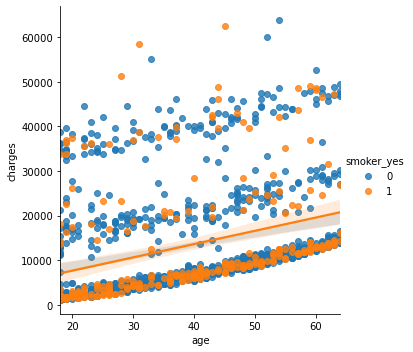

In [94]:
sns.lmplot(x="age", y="charges", hue = "smoker_yes", data=df, order=1)

###### Applying log transformation to compare Age and Charges

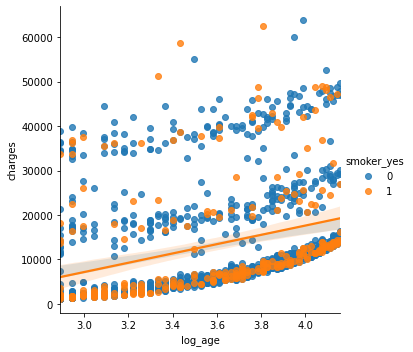

In [95]:
# apply a log transformation of CRIM
df['log_age'] = np.log(df['age'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_age", y="charges", hue = "smoker_yes", data=df, order=1)

In [96]:
df.drop(['log_age'], axis = 1, inplace = True)

###### Comparing BMI and Charges

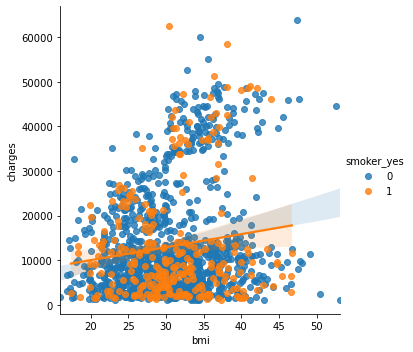

In [97]:
sns.lmplot(x="bmi", y="charges", hue = "smoker_yes" ,data=df, order=1)

###### Applying log transformation to compare BMI and Charges

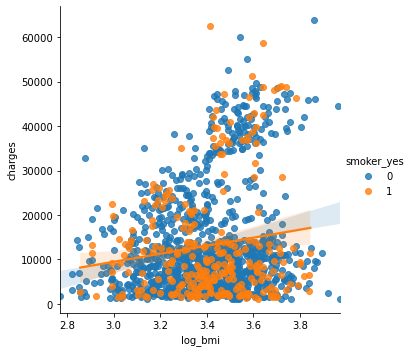

In [98]:
# apply a log transformation of CRIM
df['log_bmi'] = np.log(df['bmi'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_bmi", y="charges", hue = "smoker_yes", data=df, order=1)

In [99]:
df.drop(['log_bmi'], axis = 1, inplace = True)

###### Comparing Number of Children and charges

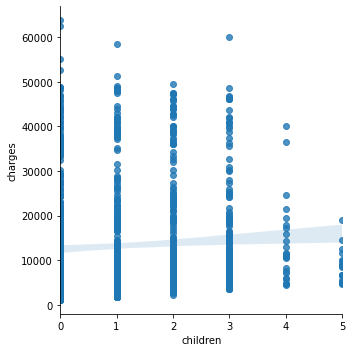

In [100]:
sns.lmplot(x="children", y="charges", data=df, order=1)

###### Applying log transformation to compare Children and Charges - Invalid due to values ranging from 0 to 1

In [101]:
# # apply a log transformation of CRIM
# df['log_children'] = np.log(df['children'])

# # plot the transformed CRIM variable vs MEDV
# sns.lmplot(x="log_children", y="charges", hue = "smoker_yes", data=df, order=1)

In [105]:
#df.drop(['log_children'], axis = 1, inplace = True)

#### 1.1 Linear Assumption - Checking Linear Relationship by examining the residuals (errors)

Assessing linear relationship by examining the residuals (errors)
Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions

3) determine the error (True house price - predicted house price)

4) observe the distribution of the error.

If the house price, in this case MEDV, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

We will do this first, for the simulated data, to become familiar with how the plots should look like. Then we will do the same for LSTAT and then, we will transform LSTAT to see how transformation affects the residuals and the linear fit.

In [106]:
# Importing the library
from sklearn.linear_model import LinearRegression

###### Comparing Age and Charges

In [107]:
df['age'].to_frame()

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [110]:
X = df['age'].to_frame()
y = df['charges']

# call the linear model from sklearn
model = LinearRegression()

# fit the model
model.fit(X, y)

# make the predictions
pred = model.predict(X)

In [111]:
pred

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

Text(0, 0.5, 'Charges')

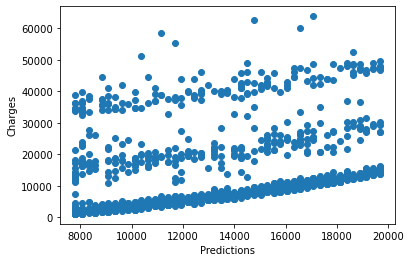

In [112]:
# plot predicted vs real
plt.scatter(x=pred, y=y)
plt.xlabel('Predictions')
plt.ylabel('Charges')

Text(0.5, 0, 'Acutal Charges')

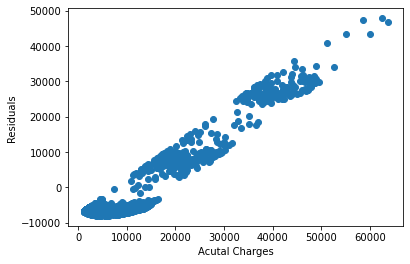

In [113]:
# Residuals plot

# calculate the residuals
error = y - pred

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(x=df['charges'], y=error)
plt.ylabel('Residuals')
plt.xlabel('Acutal Charges')

<AxesSubplot:xlabel='charges'>

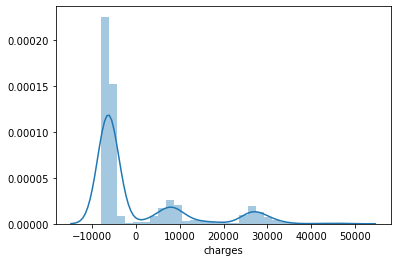

In [114]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

###### Comparing Log Transformed Age and Charges

In [115]:
np.log(df['age']).to_frame()

,age
0,2.944439
1,2.890372
2,3.332205
3,3.496508
4,3.465736
...,...
1333,3.912023
1334,2.890372
1335,2.890372
1336,3.044522


In [117]:
X = np.log(df['age']).to_frame()
y = df['charges']

# call the linear model from sklearn
model = LinearRegression()

# fit the model
model.fit(X, y)

# make the predictions
pred = model.predict(X)

In [118]:
pred

array([ 7402.19708318,  6916.15747649, 10888.03197082, ...,
        6916.15747649,  8301.90163043, 17887.91355657])

Text(0, 0.5, 'Charges')

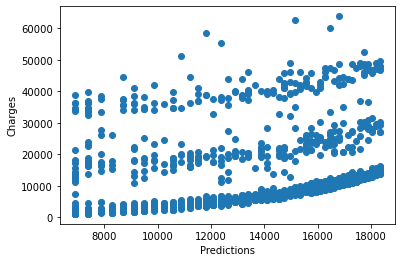

In [119]:
# plot predicted vs real
plt.scatter(x=pred, y=y)
plt.xlabel('Predictions')
plt.ylabel('Charges')

Text(0.5, 0, 'Acutal Charges')

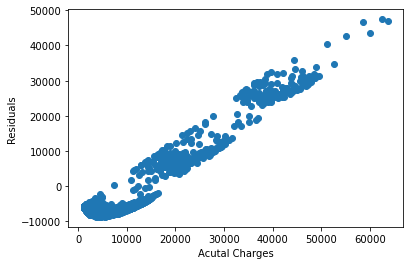

In [120]:
# Residuals plot

# calculate the residuals
error = y - pred

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(x=df['charges'], y=error)
plt.ylabel('Residuals')
plt.xlabel('Acutal Charges')

###### Comparing BMI and Charges

In [121]:
df['bmi'].to_frame()

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [122]:
X = df['bmi'].to_frame()
y = df['charges']

# call the linear model from sklearn
model = LinearRegression()

# fit the model
model.fit(X, y)

# make the predictions
pred = model.predict(X)

In [123]:
pred

array([12181.99476821, 14494.02945899, 14190.74722528, ...,
       15707.15839385, 11354.86140353, 12642.82621424])

Text(0, 0.5, 'Charges')

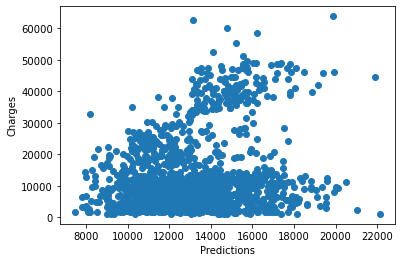

In [124]:
# plot predicted vs real
plt.scatter(x=pred, y=y)
plt.xlabel('Predictions')
plt.ylabel('Charges')

Text(0.5, 0, 'Acutal Charges')

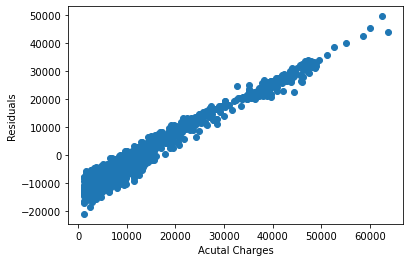

In [125]:
# Residuals plot

# calculate the residuals
error = y - pred

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(x=df['charges'], y=error)
plt.ylabel('Residuals')
plt.xlabel('Acutal Charges')

<AxesSubplot:xlabel='charges'>

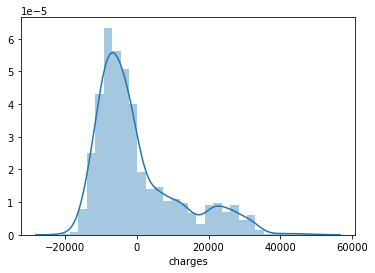

In [126]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

###### Comparing Children to Charges

In [127]:
df['children'].to_frame()

,children
0,0
1,1
2,3
3,0
4,0
...,...
1333,3
1334,0
1335,0
1336,0


In [130]:
X = df['children'].to_frame()
y = df['charges']

# call the linear model from sklearn
model = LinearRegression()

# fit the model
model.fit(X, y)

# make the predictions
pred = model.predict(X)

In [131]:
pred

array([12522.49554964, 13205.58493213, 14571.76369709, ...,
       12522.49554964, 12522.49554964, 12522.49554964])

Text(0, 0.5, 'Charges')

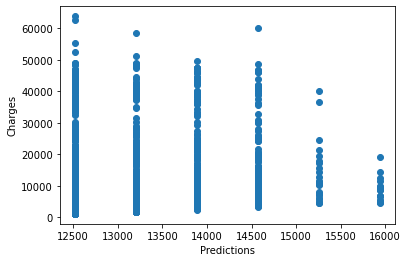

In [132]:
# plot predicted vs real
plt.scatter(x=pred, y=y)
plt.xlabel('Predictions')
plt.ylabel('Charges')

Text(0.5, 0, 'Acutal Charges')

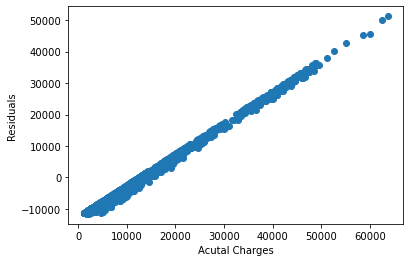

In [133]:
# Residuals plot

# calculate the residuals
error = y - pred

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(x=df['charges'], y=error)
plt.ylabel('Residuals')
plt.xlabel('Acutal Charges')

<AxesSubplot:xlabel='charges'>

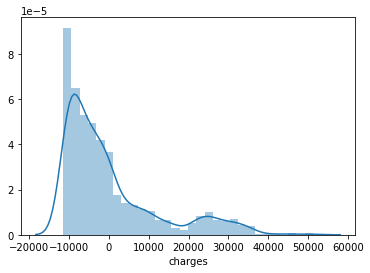

In [134]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

#### Multicolinearity
To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

In [135]:
correlation_matrix = df.corr().round(2)

<AxesSubplot:>

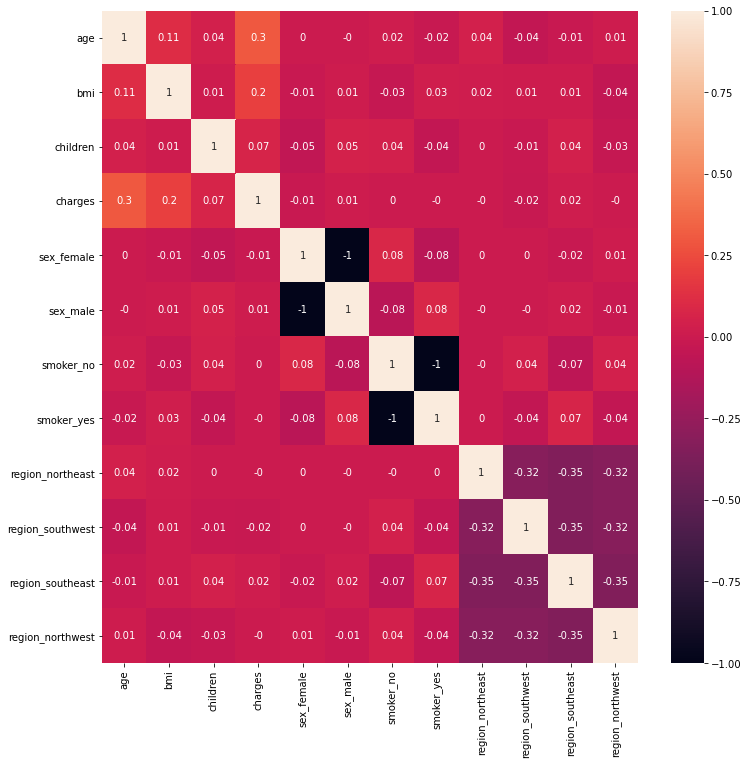

In [136]:
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

#### Normality

##### Histogram

###### Checking Distribution of Age

<AxesSubplot:xlabel='age'>

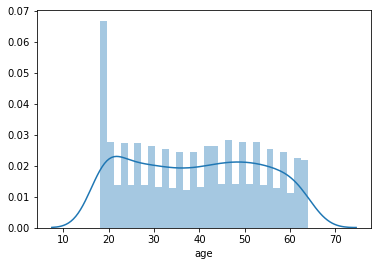

In [137]:
sns.distplot(df['age'], bins=30)

###### Checking Distribution of Log Age since Age is not normally distributed

<AxesSubplot:xlabel='age'>

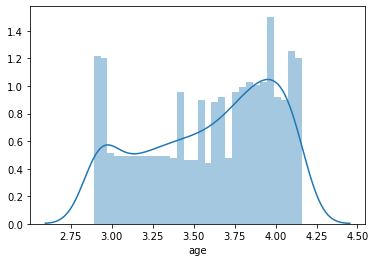

In [138]:
sns.distplot(np.log(df['age']), bins=30)

###### Checking Distribution of BMI

<AxesSubplot:xlabel='bmi'>

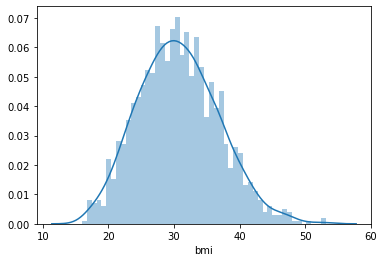

In [139]:
sns.distplot(df['bmi'], bins=50)

###### Checking Distribution of Children

<AxesSubplot:xlabel='children'>

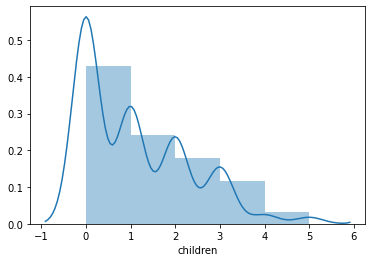

In [140]:
sns.distplot(df['children'], bins=5)

###### Checking Distribution of Log Children since Children is not normally distributed - Error

In [141]:
#sns.distplot(np.log(df['children']), bins=0.5) - Error

###### Checking Distribution of Charges

<AxesSubplot:xlabel='charges'>

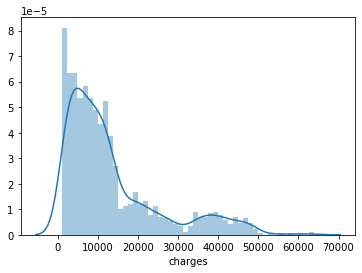

In [142]:
sns.distplot(df['charges'], bins=50)

<AxesSubplot:xlabel='charges'>

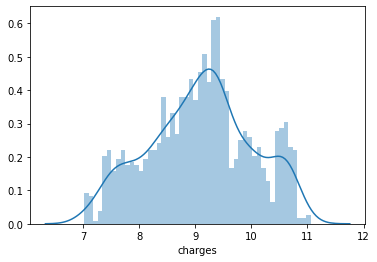

In [143]:
sns.distplot(np.log(df['charges']), bins=50)

##### Q-Q plots

In a Q-Q plot, the quantiles of the variable are plotted on the vertical axis (y), and the quantiles of a specified probability distribution (Gaussian distribution) are indicated on the horizontal axis (x). The plot consists of a series of points that show the relationship between the quantiles of the real data and the quantiles of the specified probability distribution. If the values of a variable perfectly match the specified probability distribution (i.e., the normal distribution), the points on the graph will form a 45 degree line. See below.

In [144]:
# for the Q-Q plots
import scipy.stats as stats

###### Checking Distribution of Age with Q-Q plots

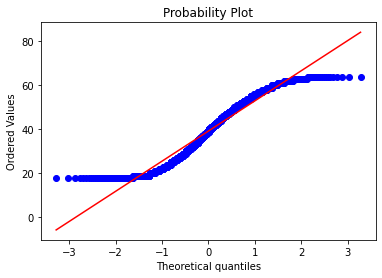

In [145]:
stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

###### Checking Distribution of BMI with Q-Q plots

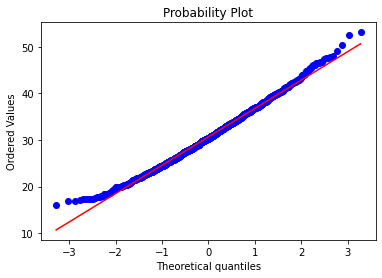

In [146]:
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.show()

###### Checking Distribution of Children with Q-Q plots

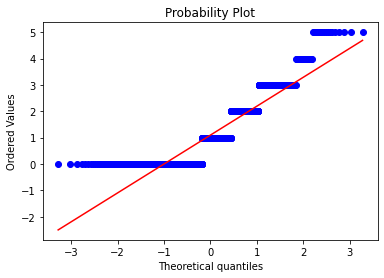

In [147]:
stats.probplot(df['children'], dist="norm", plot=plt)
plt.show()

#### Homocedasticity

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

Residuals plot
Levene’s test
Barlett’s test
Goldfeld-Quandt Test

In [148]:
# to train and evaluate the model, let's first split into
# train and test data, using the variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'bmi', 'children']],
    df['charges'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 3), (402, 3), (936,), (402,))

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
# let's scale the features
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [151]:
# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [153]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

Train set
Linear Regression mse: 126379553.69513838


In [154]:
# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Test set
Linear Regression mse: 135590303.17963448



Text(0, 0.5, 'Residuals')

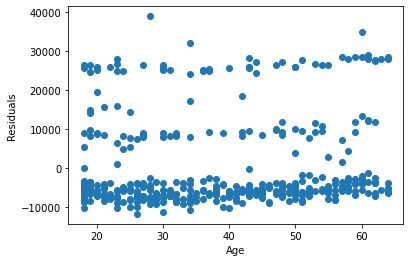

In [155]:
# calculate the residuals
error = y_test - pred

# residuals plot vs the variable
plt.scatter(x=X_test['age'], y=error)
plt.xlabel('Age')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

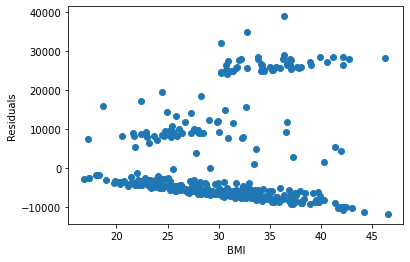

In [156]:
# calculate the residuals
error = y_test - pred

# residuals plot vs the variable
plt.scatter(x=X_test['bmi'], y=error)
plt.xlabel('BMI')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

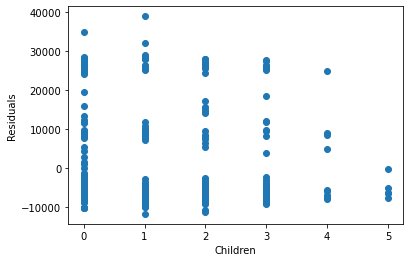

In [157]:
# calculate the residuals
error = y_test - pred

# residuals plot vs the variable
plt.scatter(x=X_test['children'], y=error)
plt.xlabel('Children')
plt.ylabel('Residuals')

<AxesSubplot:xlabel='charges'>

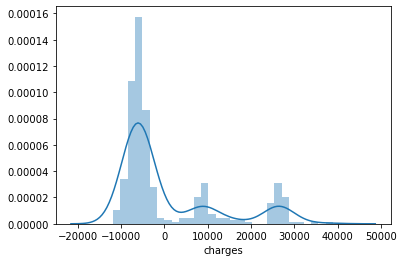

In [158]:
sns.distplot(error, bins=30)

### Transforming the variables

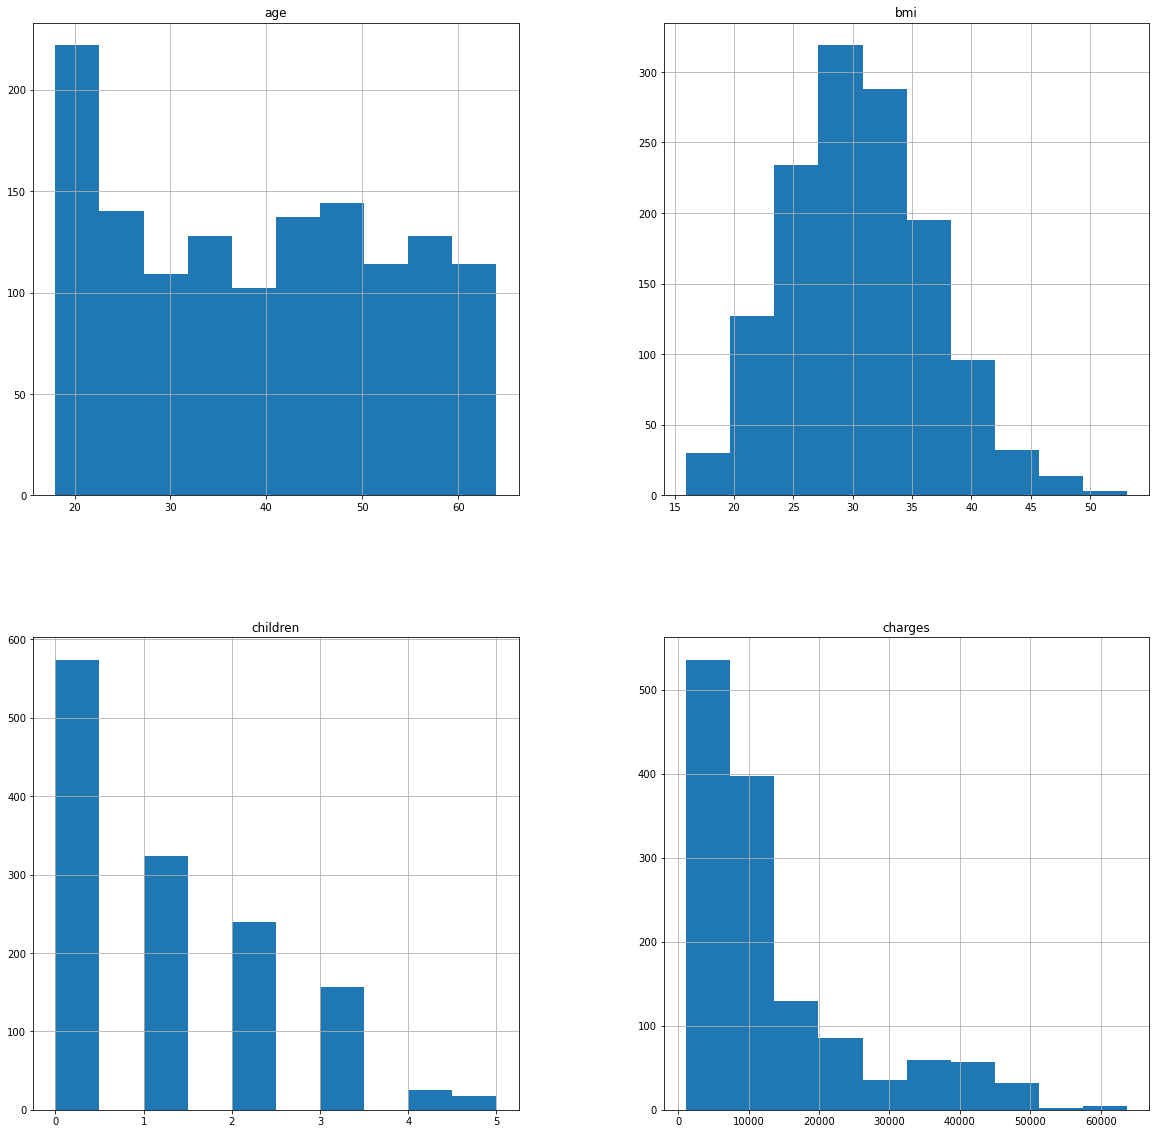

In [159]:
# let's explore the distribution of the numerical variables

dis = df_copy.hist(figsize=(20,20))

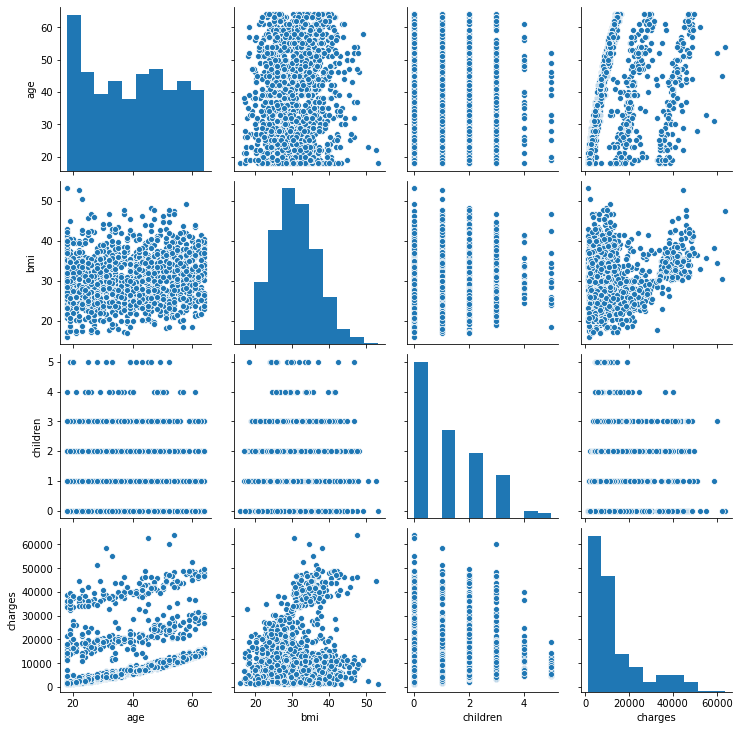

In [160]:
sns.pairplot(df_copy)

#### Function to check normality

In [161]:
 # plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    # Histogram
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    
    #Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

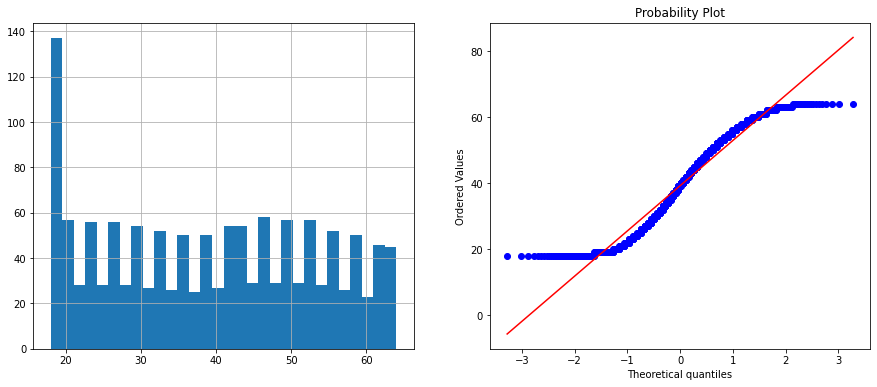

In [162]:
diagnostic_plots(df, 'age')

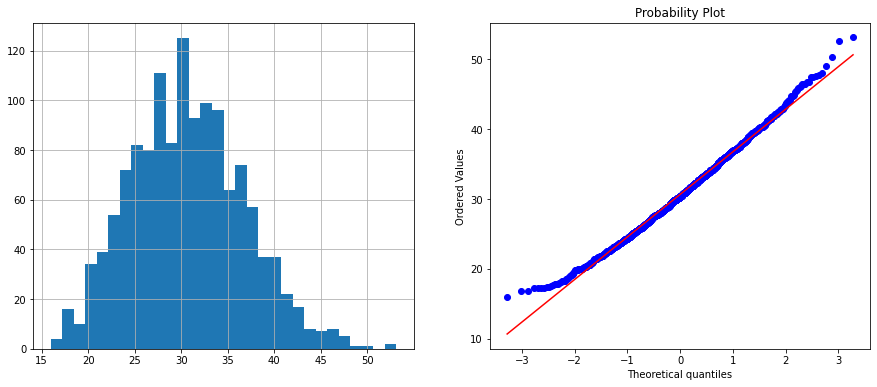

In [163]:
diagnostic_plots(df, 'bmi')

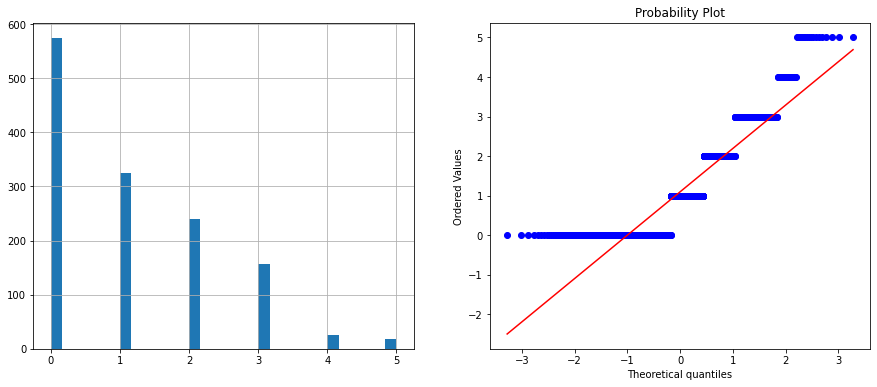

In [164]:
diagnostic_plots(df, 'children')

In [165]:
#### Importing the Variable transformer from Feature Engine

In [166]:
from feature_engine import variable_transformers as vt

##### Log Transformation using Feature Engine

In [167]:
lt = vt.LogTransformer(variables = ['age', 'bmi'])
lt.fit(df)

LogTransformer(variables=['age', 'bmi'])

In [168]:
# variables that will be transformed
lt.variables

['age', 'bmi']

In [169]:
data_tf = lt.transform(df)

In [170]:
#### Checking the distribution of Age

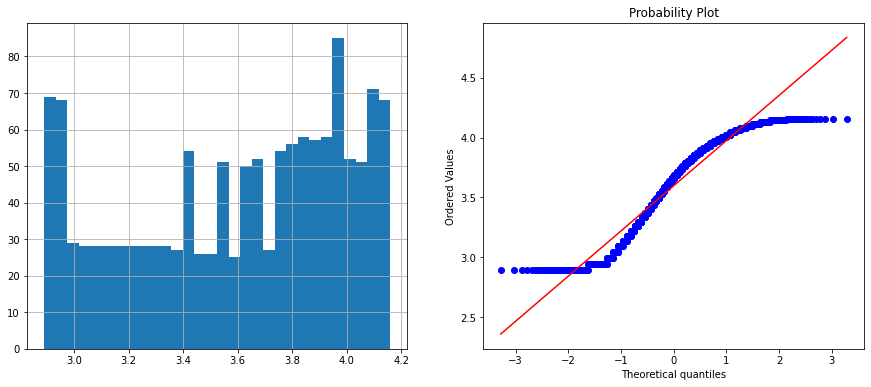

In [171]:
diagnostic_plots(data_tf, 'age')

In [172]:
#### Checking the distribution of BMI

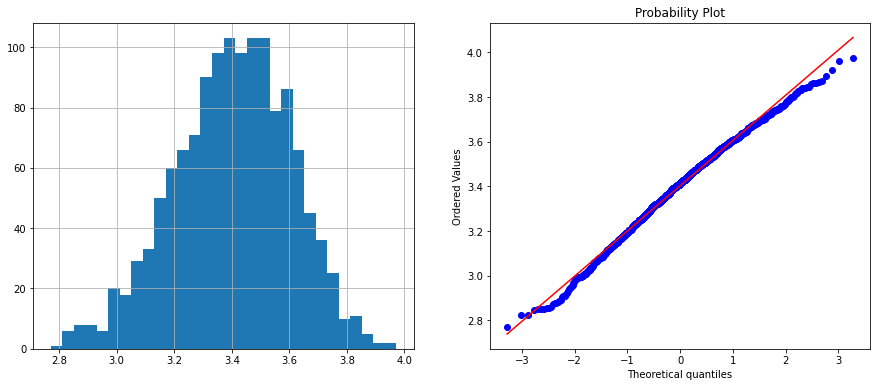

In [173]:
diagnostic_plots(data_tf, 'bmi')

##### Reciprocal Transformation using Feature Engine

In [174]:
rt = vt.ReciprocalTransformer(variables = ['age', 'bmi'])
rt.fit(df)

ReciprocalTransformer(variables=['age', 'bmi'])

In [175]:
data_tf = rt.transform(df)

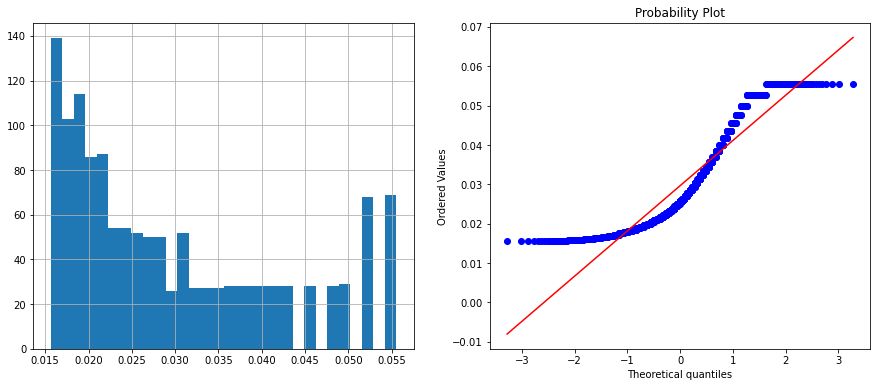

In [176]:
diagnostic_plots(data_tf, 'age')

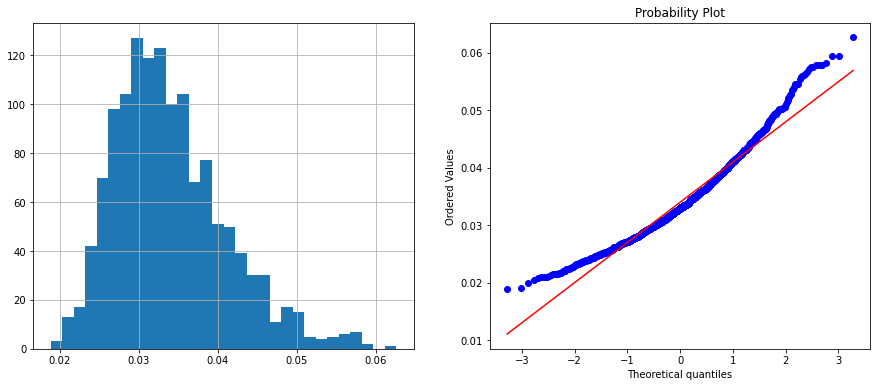

In [177]:
# transformed variable
diagnostic_plots(data_tf, 'bmi')

##### Exponential Transformation using Feature Engine

In [178]:
et = vt.PowerTransformer(variables = ['age', 'bmi'])
et.fit(df)

PowerTransformer(variables=['age', 'bmi'])

In [179]:
data_tf = et.transform(df)

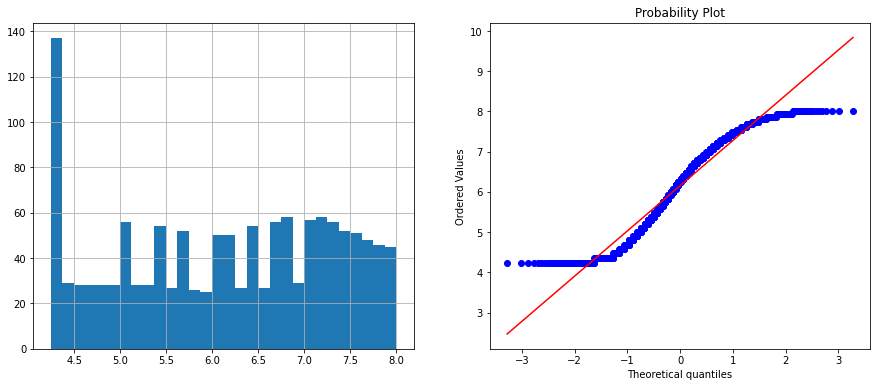

In [180]:
diagnostic_plots(data_tf, 'age')

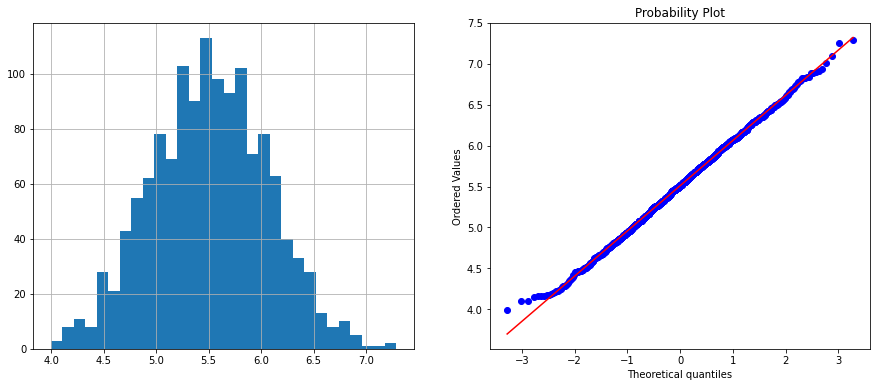

In [181]:
diagnostic_plots(data_tf, 'bmi')

##### BoxCox Transformation using Feature Engine

In [182]:
bct = vt.BoxCoxTransformer(variables = ['age', 'bmi'])
bct.fit(df)

BoxCoxTransformer(variables=['age', 'bmi'])

In [183]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'age': 0.6231934135811849, 'bmi': 0.46059764800652364}

In [184]:
data_tf = bct.transform(df)

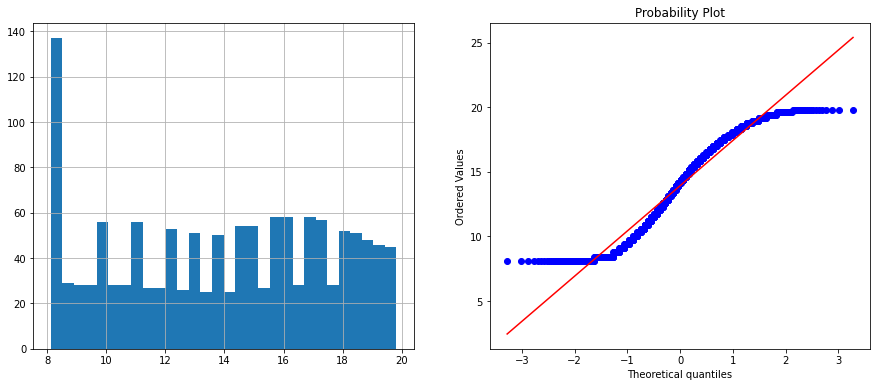

In [185]:
diagnostic_plots(data_tf, 'age')

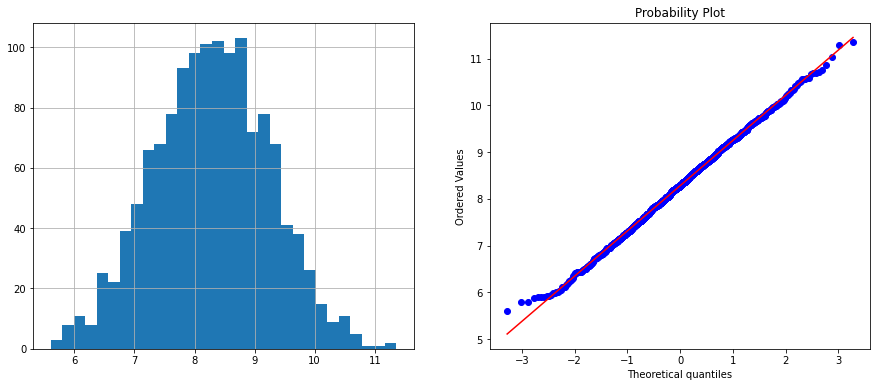

In [186]:
# transformed variable
diagnostic_plots(data_tf, 'bmi')

##### Yeo-Johnson Transformation using Feature Engine

In [187]:
yjt = vt.YeoJohnsonTransformer(variables = ['age', 'bmi'])
yjt.fit(df)

YeoJohnsonTransformer(variables=['age', 'bmi'])

In [188]:
# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'age': 0.620843894197859, 'bmi': 0.44317226670805504}

In [189]:
data_tf = yjt.transform(df)

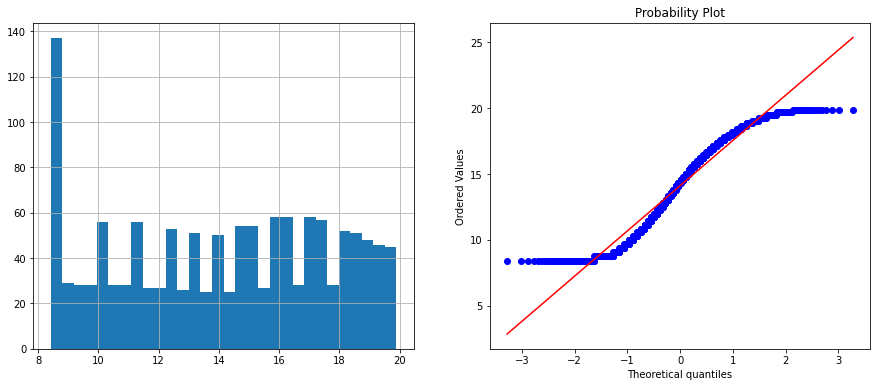

In [190]:
diagnostic_plots(data_tf, 'age')

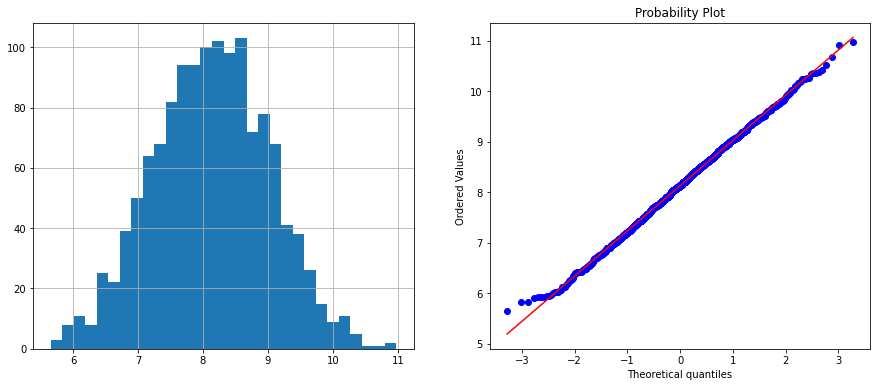

In [191]:
# transformed variable
diagnostic_plots(data_tf, 'bmi')

In [192]:
data_tf

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_southwest,region_southeast,region_northwest
0,8.734852,7.763290,0,16884.92400,1,0,1,0,1,0,0,0
1,8.410587,8.618975,1,1725.55230,1,0,1,0,0,1,0,0
2,11.419110,8.511575,3,4449.46200,1,0,1,0,0,0,1,0
3,12.771542,6.920914,0,21984.47061,1,0,1,0,0,0,0,1
4,12.507436,7.912469,0,3866.85520,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,16.888453,8.221764,3,10600.54830,0,1,1,0,0,1,0,0
1334,8.410587,8.358628,0,2205.98080,0,1,0,1,0,1,0,0
1335,8.410587,9.035842,0,1629.83350,0,1,1,0,0,0,1,0
1336,9.365502,7.433840,0,2007.94500,0,1,1,0,0,0,1,0


#### 